In [0]:
import tensorflow as tf
from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
i = Input(shape=x_train[0].shape)
x = LSTM(128)(i)
x = Dense(10, activation='softmax')(x)

model = Model(i, x)

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3434 - accuracy: 0.8898 - val_loss: 0.1215 - val_accuracy: 0.9654
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1094 - accuracy: 0.9673 - val_loss: 0.0801 - val_accuracy: 0.9748
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0752 - accuracy: 0.9772 - val_loss: 0.0656 - val_accuracy: 0.9810
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0590 - accuracy: 0.9826 - val_loss: 0.0527 - val_accuracy: 0.9832
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0468 - accuracy: 0.9852 - val_loss: 0.0550 - val_accuracy: 0.9823
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0397 - accuracy: 0.9873 - val_loss: 0.0629 - val_accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0337 - accuracy: 0.9894 - val_loss: 0.0469 - val_accuracy:

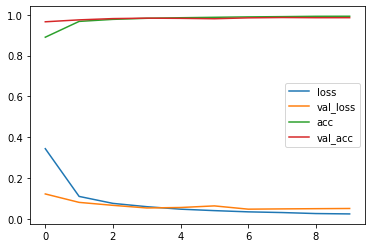

In [7]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()